# Comparison of Individual, Bagging and Boosting Algorithms

In [40]:
# !pip install xgboost -q

In [41]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

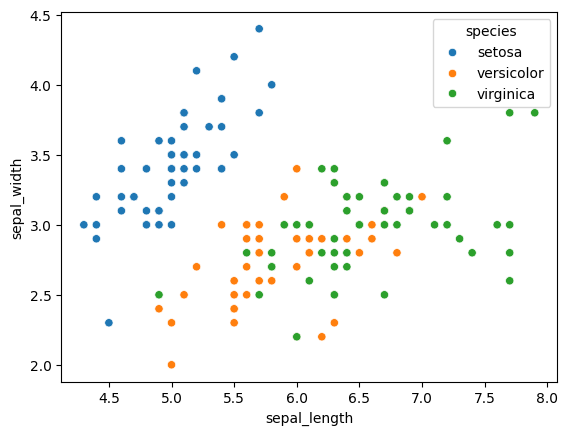

In [42]:
# import the data
df = sns.load_dataset('iris')

# Plot the data as scatter plot
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)

In [43]:
# split the data into X and y
X = df.drop('species', axis=1)
y = df['species']

# Encode the target variable
le = LabelEncoder() # only for xgboost remaining all don't need it
y = le.fit_transform(y) 


# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
%%time  

# above is called magic command

# Train the decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predict the test data
y_pred = dt.predict(X_test)

# Calculate and print accuracy score
print('Accuracy score:', accuracy_score(y_test, y_pred))

# Print precision score
print('Precision score:', precision_score(y_test, y_pred, average='micro'))

# Print recall score
print('Recall score:', recall_score(y_test, y_pred, average='micro'))

# Print F1 score
print('F1 score:', f1_score(y_test, y_pred, average='micro'))

# Print confusion matrix
print('Confusion matrix:', confusion_matrix(y_test, y_pred))

# Print classification report
print('Classification report:', classification_report(y_test, y_pred))


Accuracy score: 0.9333333333333333
Precision score: 0.9333333333333333
Recall score: 0.9333333333333333
F1 score: 0.9333333333333333
Confusion matrix: [[ 8  0  0]
 [ 0  9  0]
 [ 0  2 11]]
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.82      1.00      0.90         9
           2       1.00      0.85      0.92        13

    accuracy                           0.93        30
   macro avg       0.94      0.95      0.94        30
weighted avg       0.95      0.93      0.93        30

CPU times: total: 0 ns
Wall time: 19.4 ms


In [45]:
%%time
# Train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict the test data
y_pred = rf.predict(X_test)

# Print accuracy score
print('Accuracy score:', accuracy_score(y_test, y_pred))

# Print precision score
print('Precision score:', precision_score(y_test, y_pred, average='micro'))

# Print recall score
print('Recall score:', recall_score(y_test, y_pred, average='micro'))

# Print F1 score
print('F1 score:', f1_score(y_test, y_pred, average='micro'))


Accuracy score: 0.9333333333333333
Precision score: 0.9333333333333333
Recall score: 0.9333333333333333
F1 score: 0.9333333333333333
CPU times: total: 31.2 ms
Wall time: 178 ms


In [46]:
%%time
# train the xgboost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# predict the test data
y_pred = xgb.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))


Accuracy score:  0.9333333333333333
Precision score:  0.9333333333333333
Recall score:  0.9333333333333333
F1 score:  0.9333333333333333
CPU times: total: 453 ms
Wall time: 148 ms


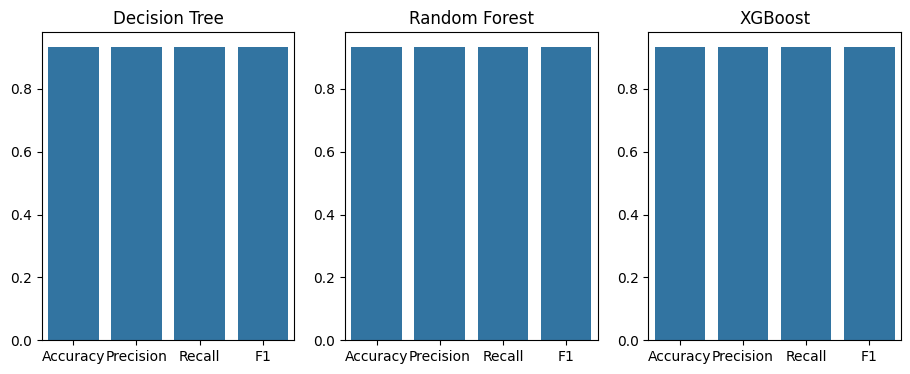

In [47]:
# make a bar plot showing each of the matrix with respect to the model
plt.figure(figsize=(15, 4))
plt.subplot(1, 4, 1)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Decision Tree')
plt.subplot(1, 4, 2)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Random Forest')
plt.subplot(1, 4, 3)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('XGBoost')
# plt.tight_layout()
plt.show()

In [48]:
df.shape

(150, 5)

## too small dataset that's why now we use a larger data set

In [49]:
# import the data
df = sns.load_dataset('diamonds')

In [50]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## We will check this through `classification` meanswe will `predict` `cut` on the basis of `other values`

In [51]:
df.shape

(53940, 10)

In [54]:
# split the data into X and y
X = df.drop('cut', axis=1)
y = df['cut']

# encode the input variables
le = LabelEncoder()
X['color'] = le.fit_transform(X['color'])
X['clarity'] = le.fit_transform(X['clarity'])

# encode the target variable
y = le.fit_transform(y)

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [55]:
%%time
# train the decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# predict the test data
y_pred = dt.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.7129217649239896
Precision score:  0.7129217649239896
Recall score:  0.7129217649239896
F1 score:  0.7129217649239896
CPU times: total: 234 ms
Wall time: 863 ms


In [56]:
%%time
# train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# predict the test data
y_pred = rf.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.7829996292176492
Precision score:  0.7829996292176492
Recall score:  0.7829996292176492
F1 score:  0.7829996292176492
CPU times: total: 5.44 s
Wall time: 18 s


In [60]:
%%time
# train the xgboost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# predict the test data
y_pred = xgb.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.7944011865035224
Precision score:  0.7944011865035224
Recall score:  0.7944011865035224
F1 score:  0.7944011865035224
CPU times: total: 7.75 s
Wall time: 1.73 s


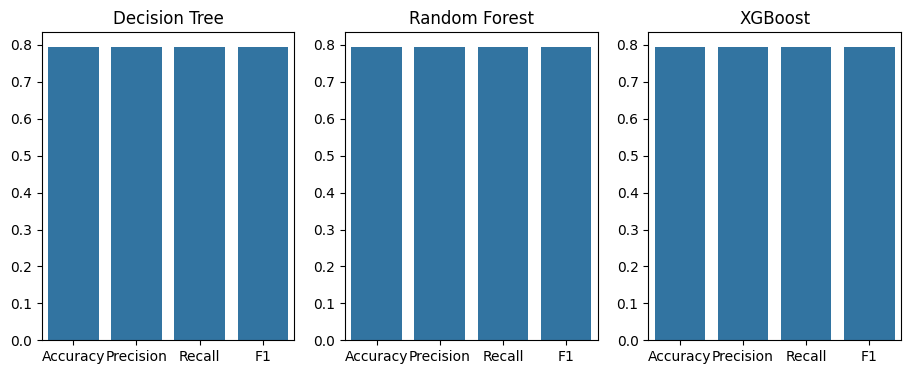

In [58]:
# make a bar plot showing each of the matrix with respect to the model
plt.figure(figsize=(15, 4))
plt.subplot(1, 4, 1)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Decision Tree')
plt.subplot(1, 4, 2)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Random Forest')
plt.subplot(1, 4, 3)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('XGBoost')
# plt.tight_layout()
plt.show()